In [67]:
# bring in numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [78]:
# LX and LY are the number of pixels in x and y directions.
# We want to find small values of LX and LY that are close to each other and permit
# good close-packing of circles of diameter nd around 8 pixels, pm 1 pixel.

# We will consider LX in the range of 32 to 64 pixels and LY in the range of 32 to 64 pixels.
# To look at all posibilities in this range, we will create a meshgrid of LX and LY values.
LX, LY = np.meshgrid(np.arange(32,128), np.arange(32,128))

# The number of circles that can be placed on a row is LX/8 and will be called nx.  Nx must
# be an integer, so we will round it to the nearest integer.
nx = np.round(LX/8., 0)

# The actual diameter of the circles is LX/nx and does not have to be exactly 8 pixels.
nd = LX/nx

# When closely packing circles, the rows are separated by sqrt(3)/2 times the diameter of the circles.
# We will call the row height nr.
nr = np.sqrt(3)/2*nd

# The number of rows that can be placed in the y direction is LY/nr and will be called ny.  Ny must
# also be an integer, so we will round it to the nearest integer.
ny = np.round(LY/nr, 0)

dx = 4 * np.pi / np.sqrt(3) * nx / LX

# The fitting error is the left over space in the y direction that is not filled by circles.
# We will call this error e.
e = LY - ny*nr

# We only want to consider cases where LX/LY is close to 1.  We will define a ratio r = LX/LY.
r = LX/LY

# Outside of the range, we will set e to 1000 so that it is not considered.
e[np.abs(1-r) > 0.5] = 1000
e[ny % 2 == 1] = 1000

# The maximum ratio that we will consider is 1.1 and the minimum ratio that we will consider is 0.9.
# The combination of LX, and LY that minimizes the fitting error abs(e) is the best choice, which
# we will call the best choice LXB, LYB.
LXB = LX[np.argmin(np.abs(e))//e.shape[0],np.argmin(np.abs(e))%e.shape[0]]
LYB = LY[np.argmin(np.abs(e))//e.shape[0],np.argmin(np.abs(e))%e.shape[0]]
nxb = nx[np.argmin(np.abs(e))//e.shape[0],np.argmin(np.abs(e))%e.shape[0]]
nyb = ny[np.argmin(np.abs(e))//e.shape[0],np.argmin(np.abs(e))%e.shape[0]]
ndb = nd[np.argmin(np.abs(e))//e.shape[0],np.argmin(np.abs(e))%e.shape[0]]
eb = e[np.argmin(np.abs(e))//e.shape[0],np.argmin(np.abs(e))%e.shape[0]]


In [74]:
LXB,LYB,nxb,nyb,ndb,eb

(36, 39, 4.0, 5.0, 9.0, 0.02885682970026693)

In [79]:
# Build a pandas dataframe to display the top 20 best choices
bestinds = np.abs(e).flatten().argsort()[:40]

df = pd.DataFrame({'LX': LX.flatten()[bestinds], 'LY': LY.flatten()[bestinds], 'nx': nx.flatten()[bestinds], 'ny': ny.flatten()[bestinds], 'nd': nd.flatten()[bestinds], 'dx': dx.flatten()[bestinds], 'e': e.flatten()[bestinds]})
df

,LX,LY,nx,ny,nd,dx,e
0,97,70,12.0,10.0,8.083333,0.897550,-0.003720
1,118,109,15.0,16.0,7.866667,0.922271,-0.003731
2,97,84,12.0,12.0,8.083333,0.897550,-0.004464
3,56,97,7.0,14.0,8.000000,0.906900,0.005155
4,72,97,9.0,14.0,8.000000,0.906900,0.005155
5,64,97,8.0,14.0,8.000000,0.906900,0.005155
6,120,97,15.0,14.0,8.000000,0.906900,0.005155
7,96,97,12.0,14.0,8.000000,0.906900,0.005155
8,88,97,11.0,14.0,8.000000,0.906900,0.005155
9,80,97,10.0,14.0,8.000000,0.906900,0.005155


In [80]:
1.15 * 2 * np.pi / 8

0.9032078879070654

In [85]:
# read minimization data file (CSV) into pandas dfExp dataframe
dfExp = pd.read_csv('../build/Release/f_mu_min.csv', header=None, names=["dx", "dy", "time", "f", "mu"], index_col=False)
dfExp

,dx,dy,time,f,mu
0,0.812138,0.837758,1500,0.000121,-0.023506
1,0.817138,0.837758,1500,0.000116,-0.023569
2,0.822138,0.837758,1500,0.000113,-0.023616
3,0.827138,0.837758,1500,0.000110,-0.023649
4,0.832138,0.837758,1500,0.000109,-0.023667
5,0.837138,0.837758,1500,0.000108,-0.023673
6,0.842138,0.837758,1500,0.000109,-0.023667
7,0.847138,0.837758,1500,0.000110,-0.023649
8,0.852138,0.837758,1500,0.000112,-0.023620
9,0.857138,0.837758,1500,0.000115,-0.023581


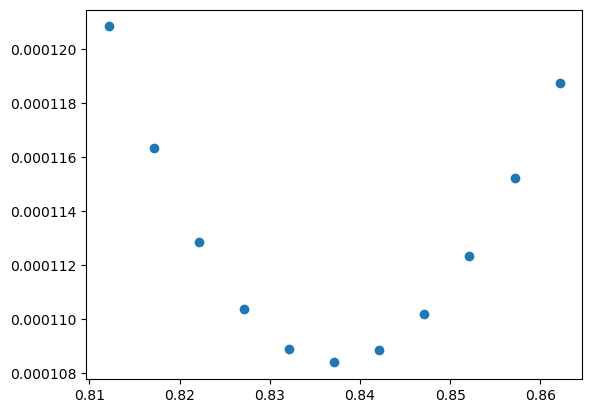

In [99]:
dxT = dfExp["dx"].iloc[:11].values
fT = dfExp["f"].iloc[:11].values

plt.scatter(dxT, fT)

In [102]:
c0 = np.polyfit(dxT, fT, 3)
np.set_printoptions(precision=15)
print(np.roots(np.array([c0[0]*3, c0[1]*2, c0[2]])))

[1.036632158483834 0.837238843353547]


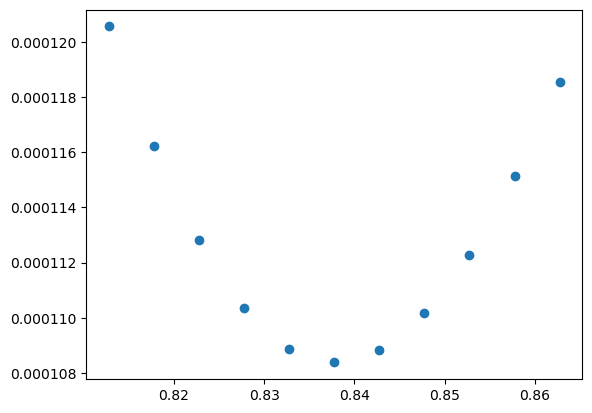

In [103]:
dyT = dfExp["dy"].iloc[11:].values
fT = dfExp["f"].iloc[11:].values

plt.scatter(dyT, fT)

In [104]:
c0 = np.polyfit(dyT, fT, 3)
np.set_printoptions(precision=15)
print(np.roots(np.array([c0[0]*3, c0[1]*2, c0[2]])))

[1.044411261375396 0.837873356328059]
